# VAD Bayesian Linear Regression Analysis

In [8]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
from pymc3 import traceplot
from sklearn.model_selection import train_test_split

# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../')
import BackwardElimination as be

In [3]:
zuco_cs = pd.read_csv(r'../Lexicons/ZuCo_words_dataset.csv')
sentences_cs = pd.read_csv(r'../Lexicons/Emotion_Sentences_Cross_Analysis.csv')

### Analysis: Arousal as dependent and MPS, TRT, GD and FFD as indipendent

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Arousal ~ MPS + TRT + GD + FFD


Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, FFD, GD, TRT, MPS, Intercept]


Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 3053 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
<ipython-input-11-f8bfa9a58d78>:23: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout();


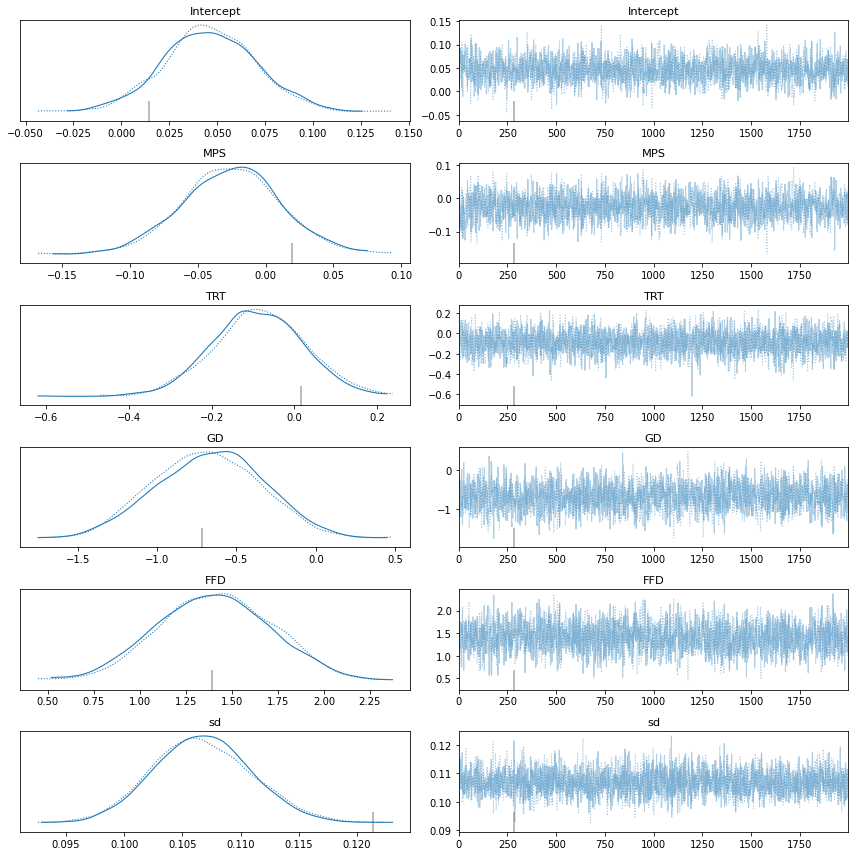

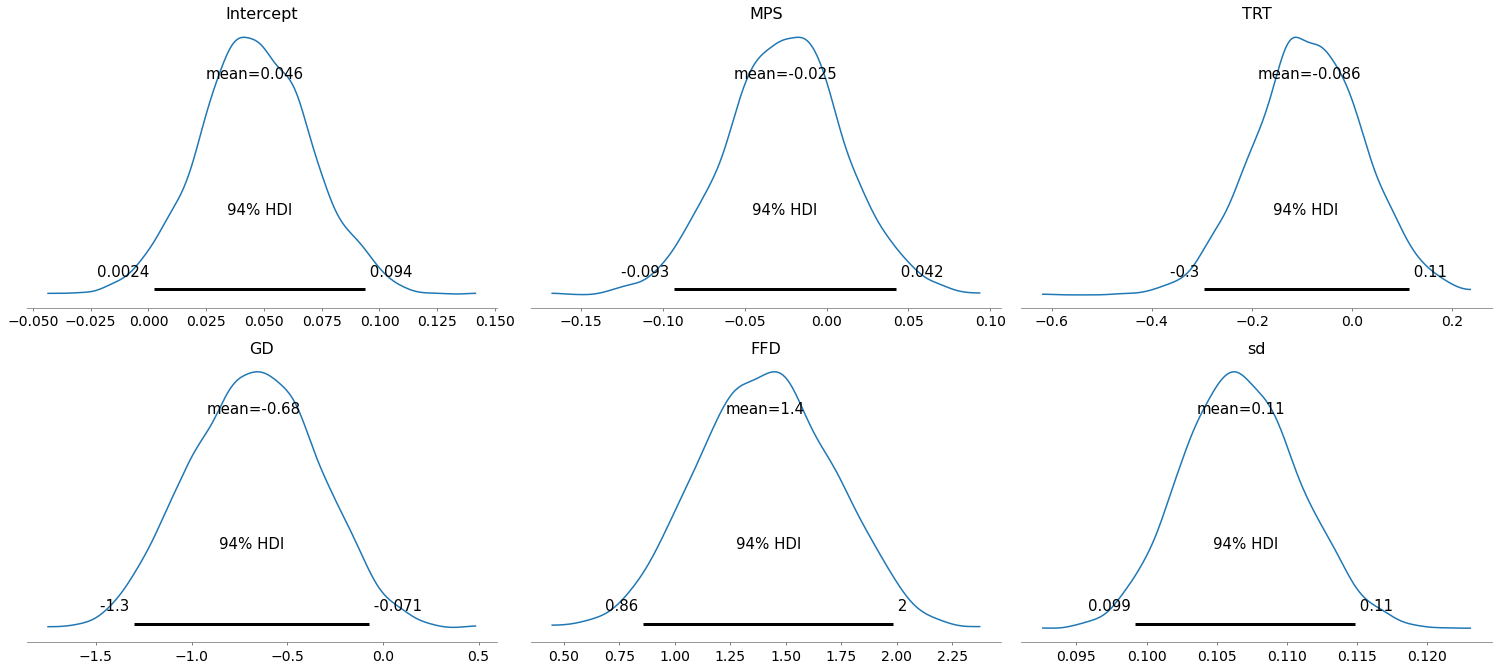

In [11]:
AR_GF_cs = pd.DataFrame(sentences_cs, columns=['Arousal','MPS','TRT','GD','FFD'])

#X_train, X_test, y_train, y_test = train_test_split(AR_GF_cs, AR_GF_cs['Arousal'],
#test_size = 0.25,random_state = 42)

x = AR_GF_cs[['MPS','TRT','GD', 'FFD']]
Arousal = AR_GF_cs['Arousal']


formula = 'Arousal ~ ' + ' + '.join(['%s' % variable for variable in x.columns[:]])
print(formula)

# Context for the model
with pm.Model() as normal_model:
        
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
# Creating the model requires a formula and data (and optionally a family)
    model = pm.GLM.from_formula(formula, data = x, family = family)
# Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 500)
    traceplot(normal_trace)
    plt.tight_layout();
    pm.plot_posterior(normal_trace)
#model.summary()


In [13]:
def evaluate_prediction(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse
median_pred = Arousal.median()
median_preds = [median_pred for _ in range(len(Arousal))]
true = Arousal
# Display mae and rmse
mae, rmse = evaluate_prediction(median_preds, true)
print('Mean Absolute Error: {:.4f}'.format(mae))
print('Root Mean Square Error: {:.4f}'.format(rmse))

Mean Absolute Error: 0.1369
Root Mean Square Error: 0.1801


### Analysis: Valence as dependent and MPS, TRT, GD and FFD as indipendent

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Valence ~ MPS + TRT + GD + FFD


Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, FFD, GD, TRT, MPS, Intercept]


Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 2586 seconds.
The acceptance probability does not match the target. It is 0.8855340999248209, but should be close to 0.8. Try to increase the number of tuning steps.
<ipython-input-14-bc032855b160>:23: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout();


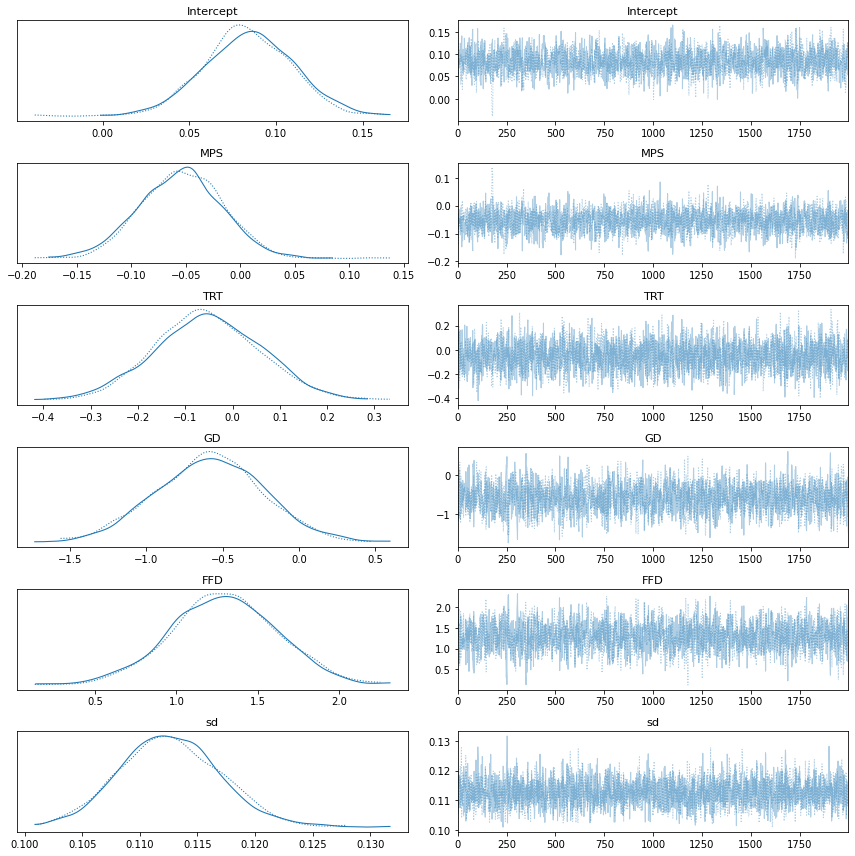

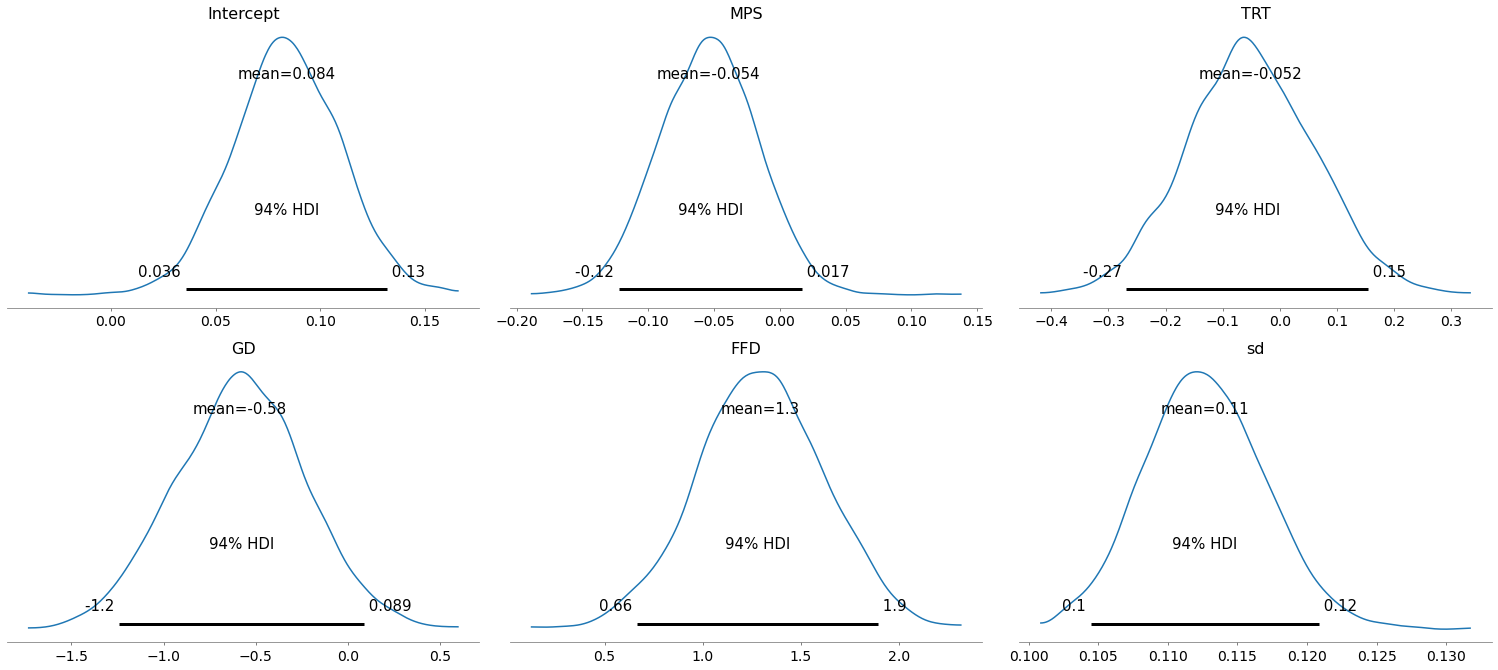

In [14]:
VA_GF_cs = pd.DataFrame(sentences_cs, columns=['Valence','MPS','TRT','GD','FFD'])

#X_train, X_test, y_train, y_test = train_test_split(AR_GF_cs, AR_GF_cs['Arousal'],
#test_size = 0.25,random_state = 42)

x = VA_GF_cs[['MPS','TRT','GD', 'FFD']]
Valence = VA_GF_cs['Valence']


formula = 'Valence ~ ' + ' + '.join(['%s' % variable for variable in x.columns[:]])
print(formula)

# Context for the model
with pm.Model() as normal_model:
        
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
# Creating the model requires a formula and data (and optionally a family)
    model = pm.GLM.from_formula(formula, data = x, family = family)
# Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 500)
    traceplot(normal_trace)
    plt.tight_layout();
    pm.plot_posterior(normal_trace)



In [15]:
median_pred = Valence.median()
median_preds = [median_pred for _ in range(len(Valence))]
true = Valence
# Display mae and rmse
mae, rmse = evaluate_prediction(median_preds, true)
print('Mean Absolute Error: {:.4f}'.format(mae))
print('Root Mean Square Error: {:.4f}'.format(rmse))

Mean Absolute Error: 0.1391
Root Mean Square Error: 0.1871


### Analysis: Dominance as dependent and MPS, TRT, GD and FFD as indipendent

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Dominance ~ MPS + TRT + GD + FFD


Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, FFD, GD, TRT, MPS, Intercept]


Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 2664 seconds.
<ipython-input-16-06911b079db9>:23: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout();


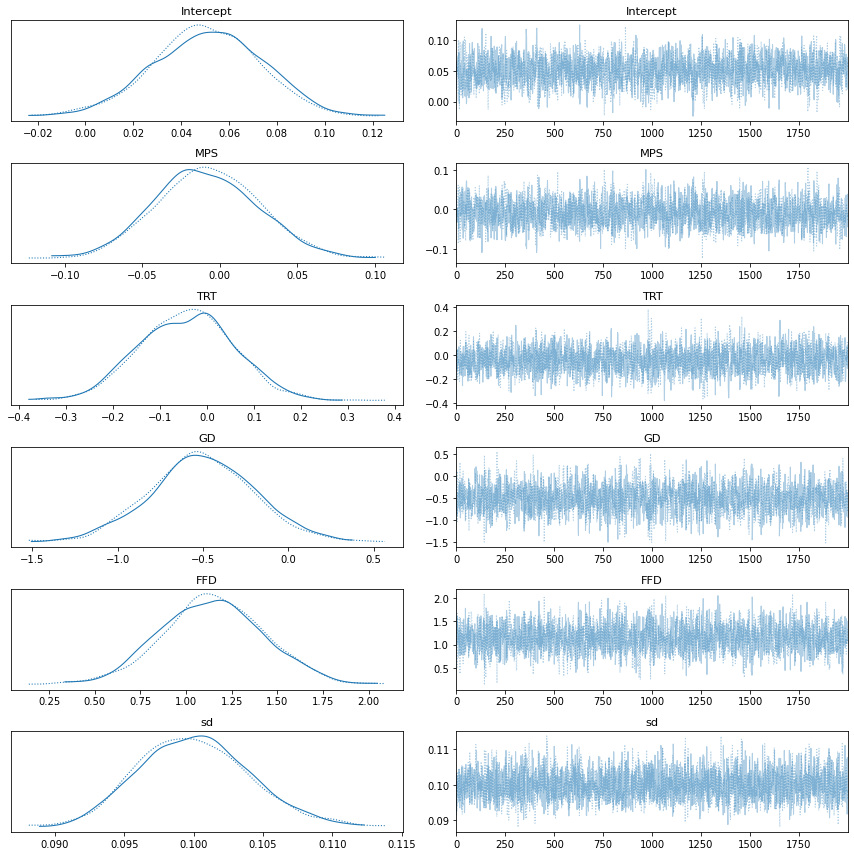

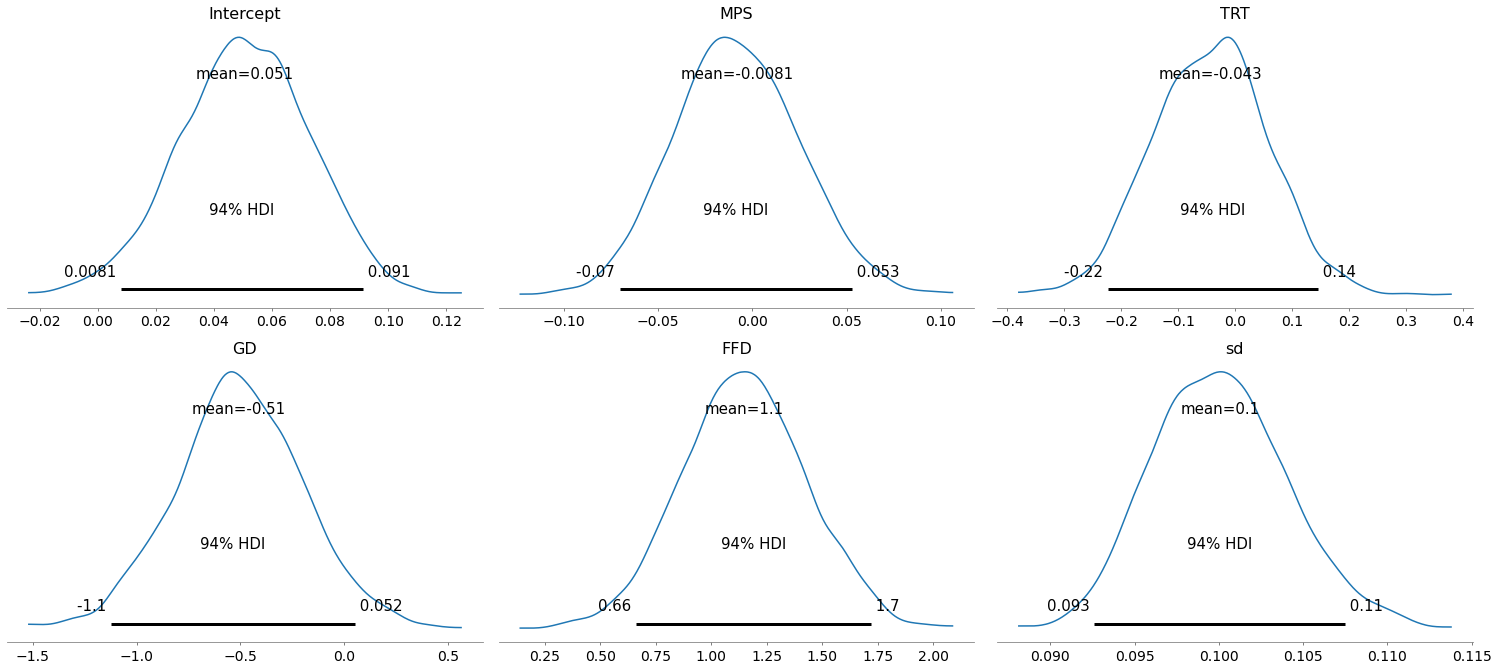

In [16]:
DO_GF_cs = pd.DataFrame(sentences_cs, columns=['Dominance','MPS','TRT','GD','FFD'])

#X_train, X_test, y_train, y_test = train_test_split(AR_GF_cs, AR_GF_cs['Arousal'],
#test_size = 0.25,random_state = 42)

x = DO_GF_cs[['MPS','TRT','GD', 'FFD']]
Dominance = DO_GF_cs['Dominance']


formula = 'Dominance ~ ' + ' + '.join(['%s' % variable for variable in x.columns[:]])
print(formula)

# Context for the model
with pm.Model() as normal_model:
        
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
# Creating the model requires a formula and data (and optionally a family)
    model = pm.GLM.from_formula(formula, data = x, family = family)
# Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 500)
    traceplot(normal_trace)
    plt.tight_layout();
    pm.plot_posterior(normal_trace)

In [ ]:
median_pred = Dominance.median()
median_preds = [median_pred for _ in range(len(Dominance))]
true = Dominance
# Display mae and rmse
mae, rmse = evaluate_prediction(median_preds, true)
print('Mean Absolute Error: {:.4f}'.format(mae))
print('Root Mean Square Error: {:.4f}'.format(rmse))